# Import Packages

In [2]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
#import packages
import matplotlib
matplotlib.use("Agg")
from keras.preprocessing.image import ImageDataGenerator #Augmentation
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array #Transform image to numpy array
from sklearn.preprocessing import LabelBinarizer #Transform "strings" labels to one-hot encoded vectors
from sklearn.model_selection import train_test_split
from keras.models import load_model
#from pyimagesearch.smallervggnet import SmallerVGGNet
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os
from IPython.display import Image

Using TensorFlow backend.


# Hyper Parameters Selection

In [2]:
#Hyper Parameters
Epochs = 100
learning_rate=1e-3
Batchsize=32
IMAGE_DIMS=(128,128,3)

# Image treatment (resizing and label appending)

In [3]:
data=[]
labels=[]
pokemonlist=["Bulbasaur","Ivysaur","Venusaur","Charmander","Charmeleon","Charizard","Squirtle","Wartortle","Blastoise"]
imagepaths=[]
for pokemon in pokemonlist:
    imagepath=sorted(list(paths.list_images("C:\\Users\\javier.cuadra\\Documents\\Datasets\\POKEMON2\\pokeimages\\"+pokemon)))
    imagepaths.extend(imagepath)
for imagePath in imagepaths:
    try:
        image=cv2.imread(imagePath)
        
        image = cv2.resize(image, (128, 128))
        image=img_to_array(image)
        data.append(image)
    
        label=imagePath.split(os.path.sep)[-2]
        labels.append(label)
    except:
        print(imagePath) #Error message in case that the image cannot be read

C:\Users\javier.cuadra\Documents\Datasets\POKEMON2\pokeimages\Bulbasaur\61.png
C:\Users\javier.cuadra\Documents\Datasets\POKEMON2\pokeimages\Bulbasaur\63.png
C:\Users\javier.cuadra\Documents\Datasets\POKEMON2\pokeimages\Bulbasaur\67.png
C:\Users\javier.cuadra\Documents\Datasets\POKEMON2\pokeimages\Bulbasaur\84.png
C:\Users\javier.cuadra\Documents\Datasets\POKEMON2\pokeimages\Ivysaur\126.png
C:\Users\javier.cuadra\Documents\Datasets\POKEMON2\pokeimages\Ivysaur\46.png
C:\Users\javier.cuadra\Documents\Datasets\POKEMON2\pokeimages\Venusaur\80.png
C:\Users\javier.cuadra\Documents\Datasets\POKEMON2\pokeimages\Charmander\134.png
C:\Users\javier.cuadra\Documents\Datasets\POKEMON2\pokeimages\Charmander\136.png
C:\Users\javier.cuadra\Documents\Datasets\POKEMON2\pokeimages\Charmander\31.png
C:\Users\javier.cuadra\Documents\Datasets\POKEMON2\pokeimages\Charmander\52.png
C:\Users\javier.cuadra\Documents\Datasets\POKEMON2\pokeimages\Charmander\61.png
C:\Users\javier.cuadra\Documents\Datasets\POKEMON

# Normalization of the dataset and train/test split

In [4]:
data=np.array(data,dtype="float")/255.0
labels=np.array(labels)
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
(trainX,testX,trainY,testY)=train_test_split(data,labels,test_size=0.2, random_state=42)

# Generation of the augmentation set

In [5]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                        horizontal_flip=True, fill_mode='nearest')

# Implementation of the VGG architecture with minor tweaks adapted to the image size

In [10]:
model = Sequential()
depth=3
height=128
width=128
classes=9
inputShape = [depth, height, width]
chanDim = 1
# Adding layers to our model
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(128,128,3)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))
    # (Conv+Relu)*2
model.add(Conv2D(64,(3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64,(3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    # (Conv+Relu)*2
model.add(Conv2D(128,(3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128,(3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    # FullyConnected+Softmax
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
    # Softmax Classifier
model.add(Dense(classes))
model.add(Activation("softmax"))

# Initialization and training of the model

In [11]:
#Initialize the model
opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss="categorical_crossentropy",optimizer=opt,
             metrics=["accuracy"])

In [12]:
#Train the network
print("[Info] Training network...")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=Batchsize),
                       validation_data=(testX,testY),
                       steps_per_epoch=len(trainX)//Batchsize,
                       epochs=Epochs, verbose=1)

[Info] Training network...
Epoch 1/100
23/23 [==============================] - 133s 6s/step - loss: 2.6633 - acc: 0.2538 - val_loss: 2.4348 - val_acc: 0.3717
Epoch 2/100
23/23 [==============================] - 130s 6s/step - loss: 2.1063 - acc: 0.3760 - val_loss: 3.3597 - val_acc: 0.3141
Epoch 3/100
23/23 [==============================] - 130s 6s/step - loss: 2.1183 - acc: 0.3490 - val_loss: 3.5651 - val_acc: 0.3665
Epoch 4/100
23/23 [==============================] - 130s 6s/step - loss: 1.6555 - acc: 0.4858 - val_loss: 2.9252 - val_acc: 0.4188
Epoch 5/100
23/23 [==============================] - 131s 6s/step - loss: 1.6594 - acc: 0.4524 - val_loss: 2.4669 - val_acc: 0.5183
Epoch 6/100
23/23 [==============================] - 129s 6s/step - loss: 1.4140 - acc: 0.5178 - val_loss: 3.4322 - val_acc: 0.4241
Epoch 7/100
23/23 [==============================] - 130s 6s/step - loss: 1.4515 - acc: 0.5264 - val_loss: 2.2427 - val_acc: 0.5236
Epoch 8/100
23/23 [==============================

# Save the model and the labels

In [16]:
model.save("C:\\Users\\javier.cuadra\\Documents\\Python\\Keras\\modelnew")
f=open("C:\\Users\\javier.cuadra\\Documents\\Python\\Keras\\labelsnew","wb")
f.write(pickle.dumps(lb))
f.close()

# Image Prediction

In [23]:
#Clasificación
imagepath="C:\\Users\\javier.cuadra\\Documents\\Python\\Keras\\ImagenesPrueba\\chargafas.jpg"
image = cv2.imread(imagepath)
image=cv2.resize(image,(128,128))
image=image.astype("float")/255.0
image=img_to_array(image)
image=np.expand_dims(image,axis=0)

#Carga del modelo
model=load_model("C:\\Users\\javier.cuadra\\Documents\\Python\\Keras\\model2")
lb=pickle.loads(open("C:\\Users\\javier.cuadra\\Documents\\Python\\Keras\\labels2","rb").read())
prueba=model.predict(image)[0]
idx=np.argmax(prueba)
label=lb.classes_[idx]

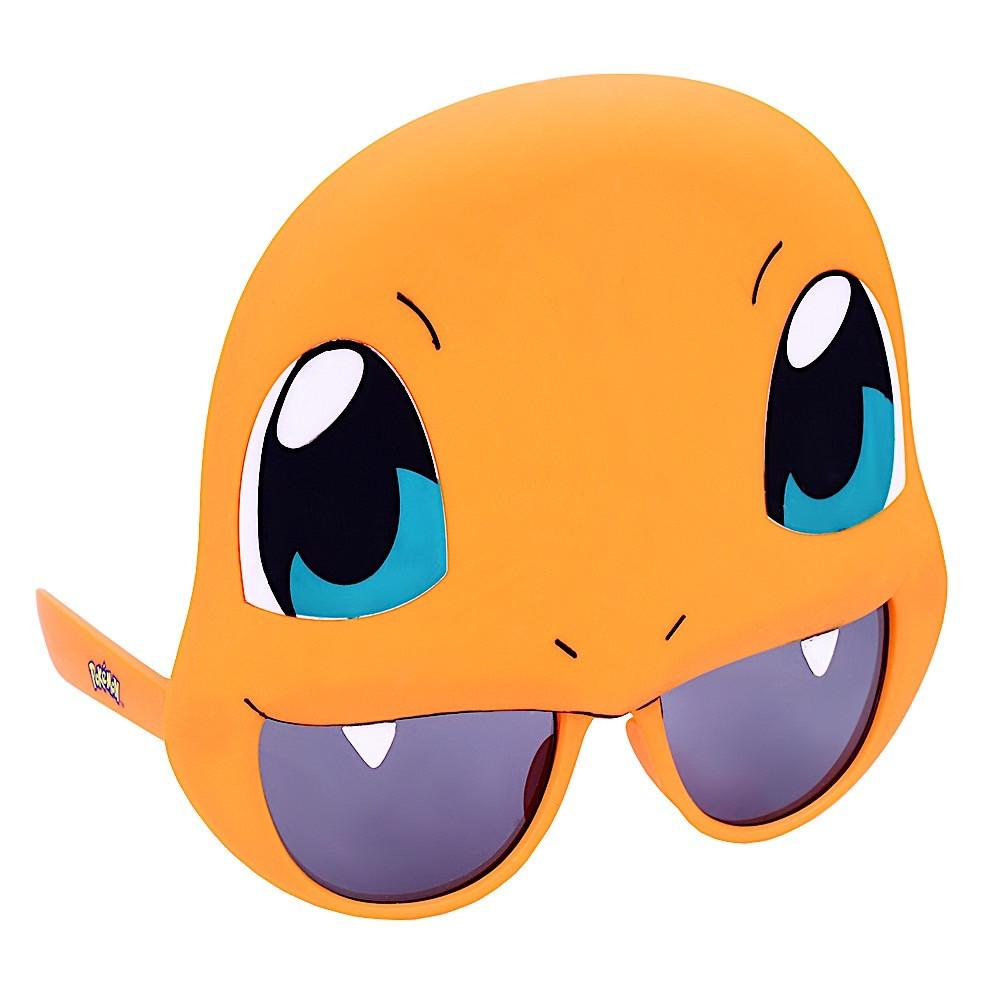

In [24]:
Image(filename=imagepath,width=200, height=200) 


In [25]:
print("El Pokemon es: " + label)

El Pokemon es: Charmander
